In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

%matplotlib widget
os.chdir('/asap3/flash/gpfs/fl26/2023/data/11015602/shared/Harijyoti/simulation_results_optimisized_50fs_V3.3')
os.getcwd()

'/asap3/flash/gpfs/fl26/2023/data/11015602/shared/Harijyoti/simulation_results_optimisized_50fs_V3.3'

In [2]:
ls

pop_t_stepseV_0.001_21.101_d_sep_0.00015_d_pes0.0015_d_ped_0.001.csv
pop_t_stepseV_0.001_21.102_d_sep_0.00015_d_pes0.0015_d_ped_0.001.csv
pop_t_stepseV_0.001_21.103_d_sep_0.00015_d_pes0.0015_d_ped_0.001.csv
pop_t_stepseV_0.001_21.104_d_sep_0.00015_d_pes0.0015_d_ped_0.001.csv
pop_t_stepseV_0.001_21.105_d_sep_0.00015_d_pes0.0015_d_ped_0.001.csv
pop_t_stepseV_0.001_21.106_d_sep_0.00015_d_pes0.0015_d_ped_0.001.csv
pop_t_stepseV_0.001_21.107_d_sep_0.00015_d_pes0.0015_d_ped_0.001.csv
pop_t_stepseV_0.001_21.108_d_sep_0.00015_d_pes0.0015_d_ped_0.001.csv
pop_t_stepseV_0.001_21.109_d_sep_0.00015_d_pes0.0015_d_ped_0.001.csv
pop_t_stepseV_0.001_21.111_d_sep_0.00015_d_pes0.0015_d_ped_0.001.csv
pop_t_stepseV_0.001_21.112_d_sep_0.00015_d_pes0.0015_d_ped_0.001.csv
pop_t_stepseV_0.001_21.113_d_sep_0.00015_d_pes0.0015_d_ped_0.001.csv
pop_t_stepseV_0.001_21.114_d_sep_0.00015_d_pes0.0015_d_ped_0.001.csv
pop_t_stepseV_0.001_21.115_d_sep_0.00015_d_pes0.0015_d_ped_0.001.csv
pop_t_stepseV_0.001_21.116_d_sep_0

In [3]:
# Time array(in fs)
start_time = -200  # fs
stop_time = 200 # fs
steps = 100000  # steps

t_values_SI = np.linspace(start_time, stop_time, steps)  # Time array in femtoseconds
t_values = t_values_SI * 41  # Time array in atomic units

# Time step
dt = t_values[1] - t_values[0]
timestep = 50 #fs
t_max = (timestep-5)*41*3
index = np.where(t_values_SI < (t_max/41 + (0.41)/2))[0][-1]

In [4]:
#results_dfs = pd.read_pickle('results_dfs_stepseV_0.001_d_sep_0.0002_d_pes0.001_d_ped_0.001.pkl')
results_dfp = pd.read_pickle('results_dfp_stepseV_0.001_d_sep_0.00015_d_pes0.0015_d_ped_0.001.pkl')
#results_dfp = pd.read_pickle('results_dfp_stepseV_0.001_d_sep_0.0002_d_pes0.001_d_ped_0.001.pkl')
results_dfs = pd.read_pickle('results_dfs_stepseV_0.001_d_sep_0.00015_d_pes0.0015_d_ped_0.001.pkl')

In [5]:
def C_t(t, t_min, t_max, delta_T):
    return np.where(
        t < t_min - delta_T, 0,
        np.where(t < t_min, np.sin((t - (t_min - delta_T)) * (np.pi / (2 * delta_T))) ** 2,
        np.where(t <= t_max, 1,
        np.where(t <= t_max + delta_T, np.cos((t - t_max) * (np.pi / (2 * delta_T))) ** 2, 0))))

# Function for E_omega (fundamental frequency)
def E_omega(t, E0, omega, t0, tau, phi, t_min, t_max, delta_T):
    envelope = np.exp(-((t - t0) / tau) ** 2)
    oscillation = np.cos(omega * t + phi)
    return E0 * envelope * oscillation * C_t(t, t_min, t_max, delta_T)

# Function for E_2omega (second harmonic)
def E_2omega(t, E02, omega, t0, tau, phi, t_min, t_max, delta_T):
    envelope = np.exp(-((t - t0) / tau) ** 2)
    oscillation = np.cos(2 * omega * t + phi)  # Second harmonic = 2 * omega
    return E02 * envelope * oscillation * C_t(t, t_min, t_max, delta_T)

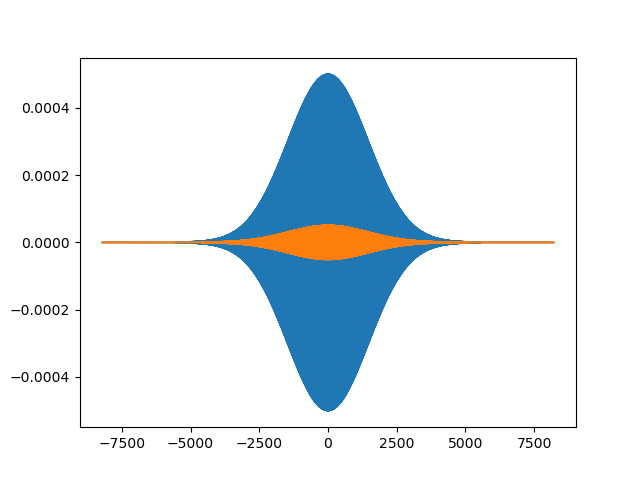

In [6]:
# Electric Field parameters
phi1 = 0.0
phi2 = 0.0
tau = 50  # fs
tau_au = tau * 41
t0 = 0 # fs  # setting t0 to a non-zero value to avoid zero limit issue
t0_au = t0 * 41
E0_au = 0.0005
E02_au = 0.00005
omega = 21.2/27.2
t_min = -(tau-5)*41*3
t_max = (tau-5)*41*3
delta_T = dt*10
E_om = E_omega(t_values, E0_au, omega, t0_au, tau_au, phi1, t_min, t_max, delta_T)
E_2om = E_2omega(t_values, E02_au, omega, t0_au, tau_au, phi2, t_min, t_max, delta_T)
plt.figure()
plt.plot(t_values, E_om)
plt.plot(t_values, E_2om)
plt.show()

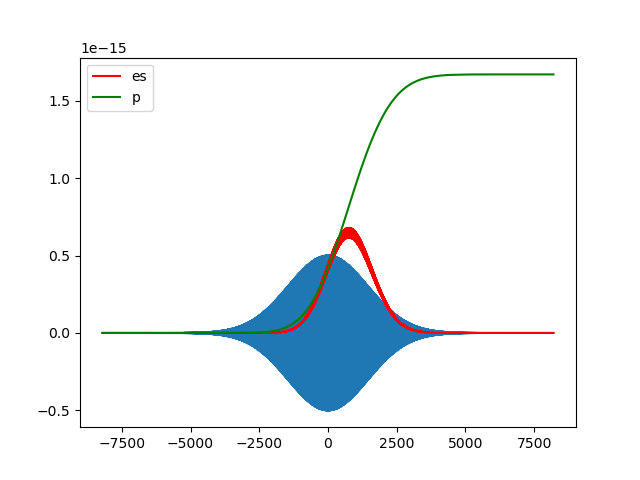

In [7]:
plt.figure()
#plt.plot(results_dfp['df_pop_21.1']['s'])
#plt.plot(results_dfp['df_pop_21.1']['p'])
#plt.plot(results_dfp['df_pop_21.1']['ep'], color = 'b', marker = '.', label = '21.1')
#plt.plot(t_values_SI[1:], results_dfp['df_pop_21.2']['es'], color = 'r',  label = '21.2')
plt.plot(t_values, E_om/1e12)
plt.plot(t_values[1:], results_dfp['df_pop_21.2']['es'], color = 'r',  label = 'es')
plt.plot(t_values[1:], (results_dfp['df_pop_21.2']['p'])/1e12, color = 'g',  label = 'p')
#plt.plot(results_dfp['df_pop_21.29']['ep'],color = 'g', marker = 'x', label = '21.3')
#plt.ylim(-1e-100,1e-100)
plt.legend()
#plt.plot(results_dfp['df_pop_21.1']['ed'])
plt.show()

In [65]:
populations = []
populationp = []
populationes = []
populationep = []
populationed = []
iloc_val = index
steps_eV = 0.01
omega_values = np.round(np.arange(21.1, 21.3, steps_eV), 3)
for omega_ev in omega_values:
    #print(omega_ev)
    df = results_dfp[f'df_pop_{omega_ev}']
    populations.append(df['s'].iloc[iloc_val])
    populationp.append(df['p'].iloc[iloc_val])
    populationes.append(df['es'].iloc[iloc_val])
    populationep.append(df['ep'].iloc[iloc_val])
    populationed.append(df['ed'].iloc[iloc_val])    
    

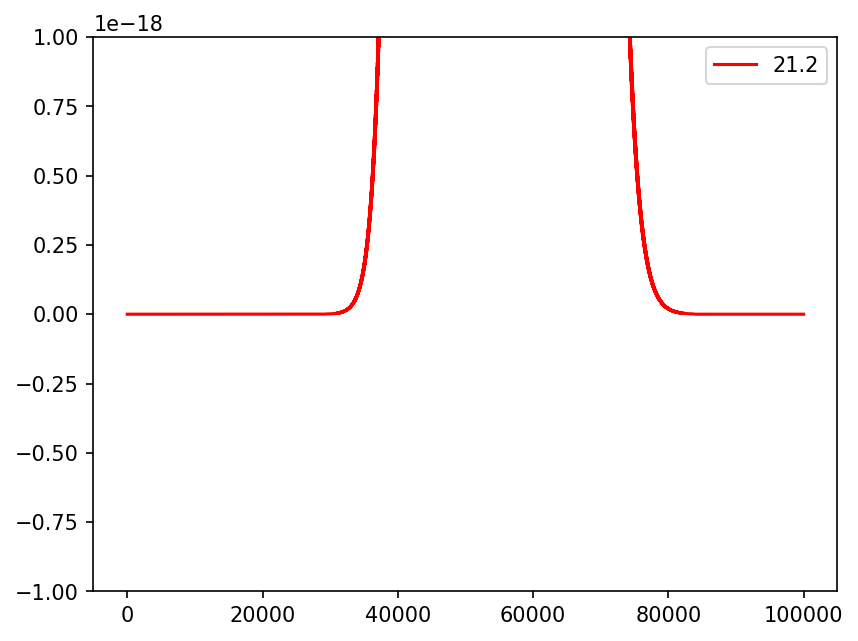

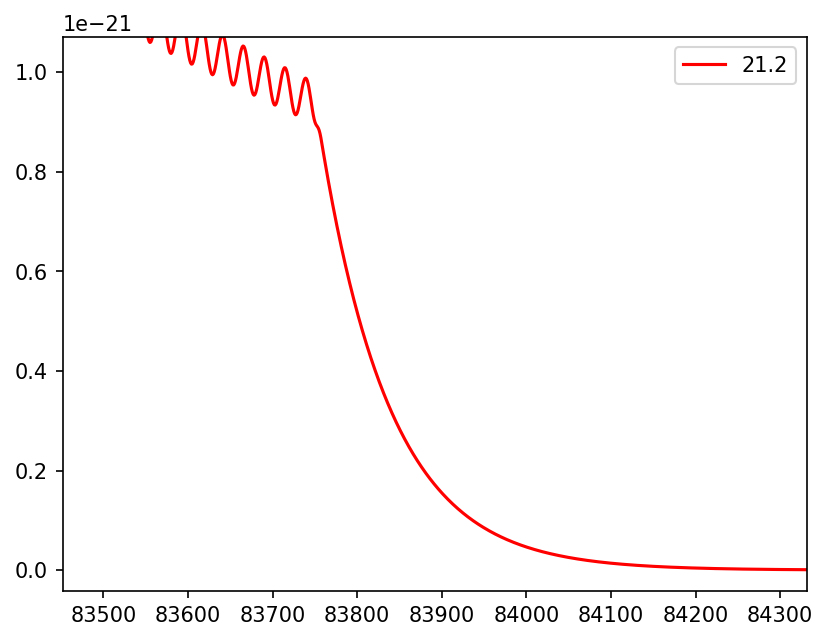

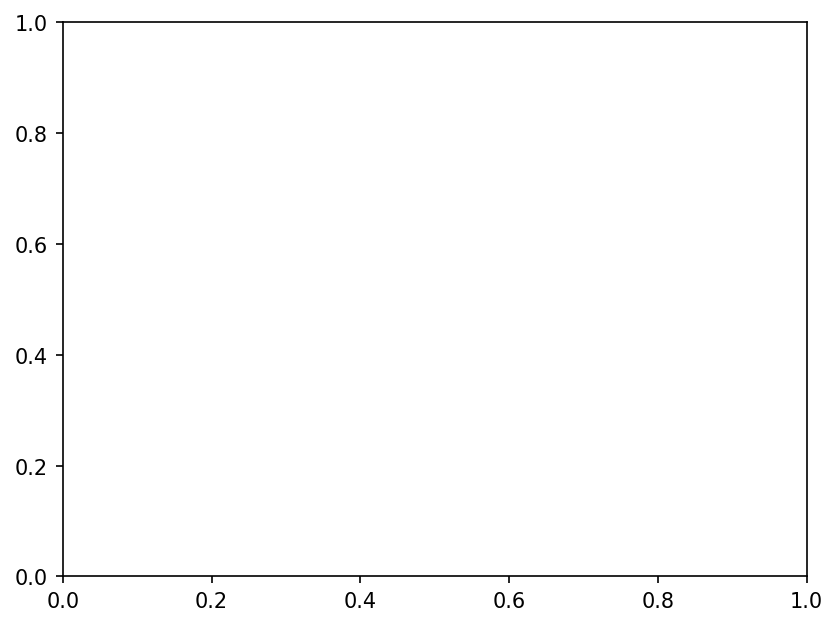

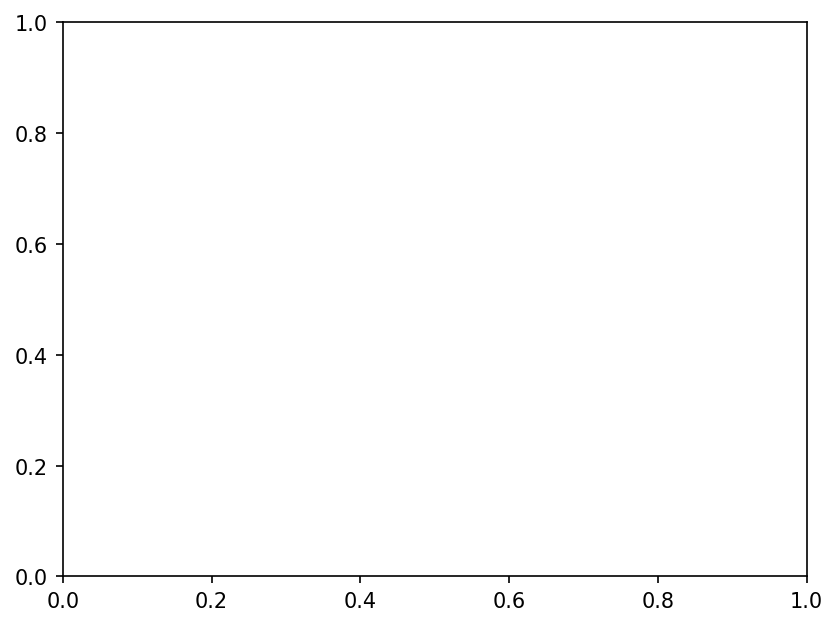

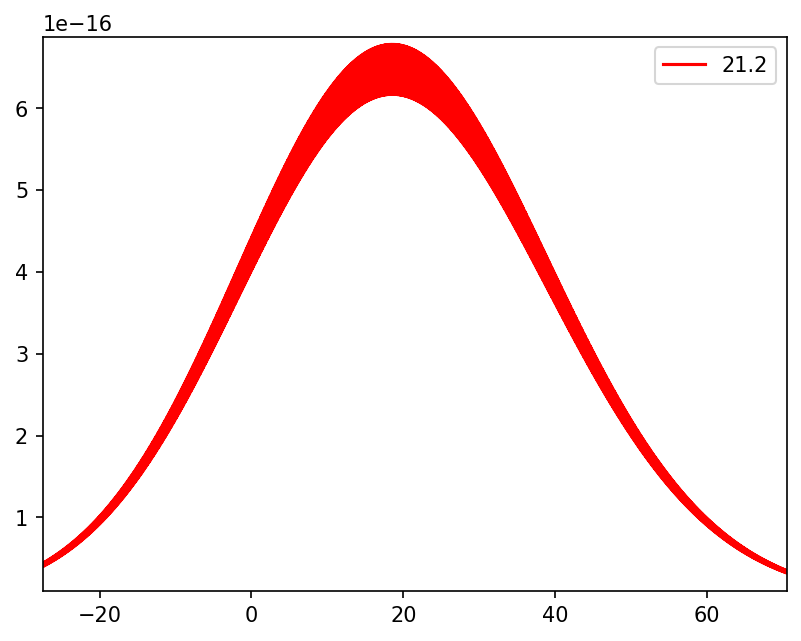

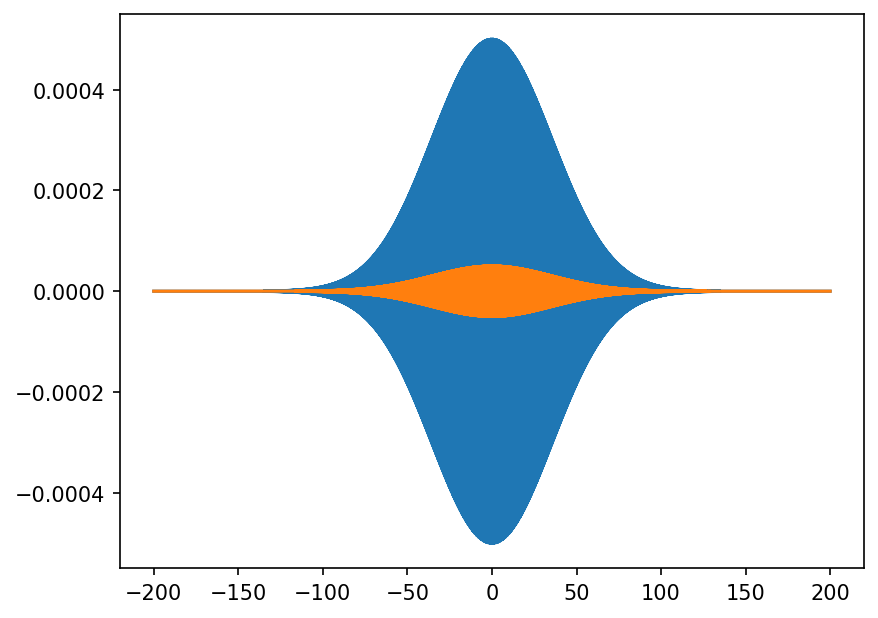

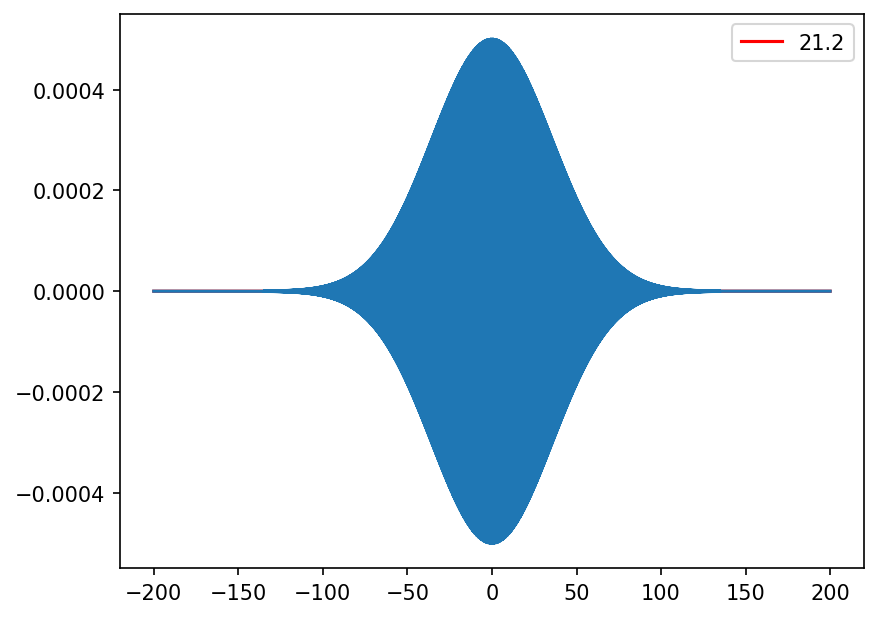

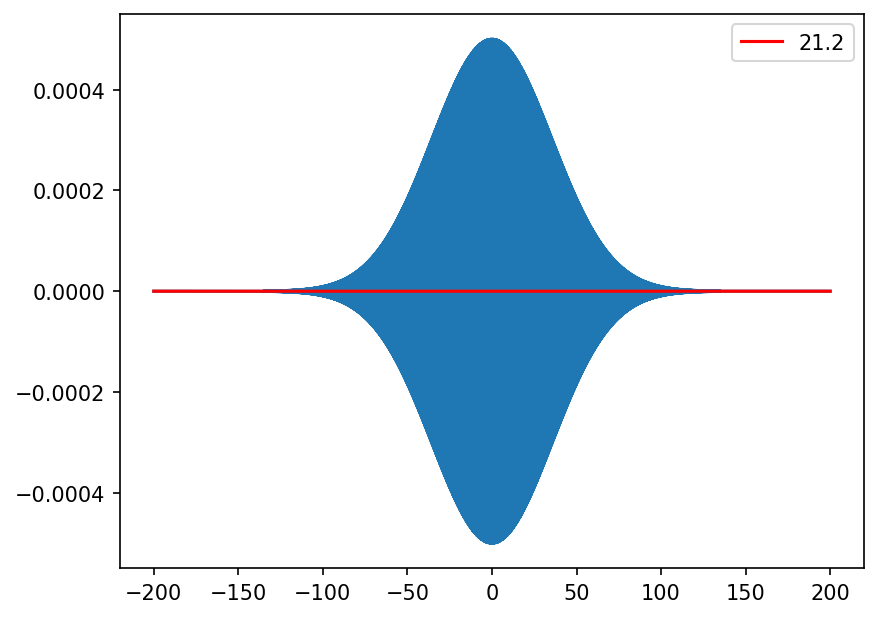

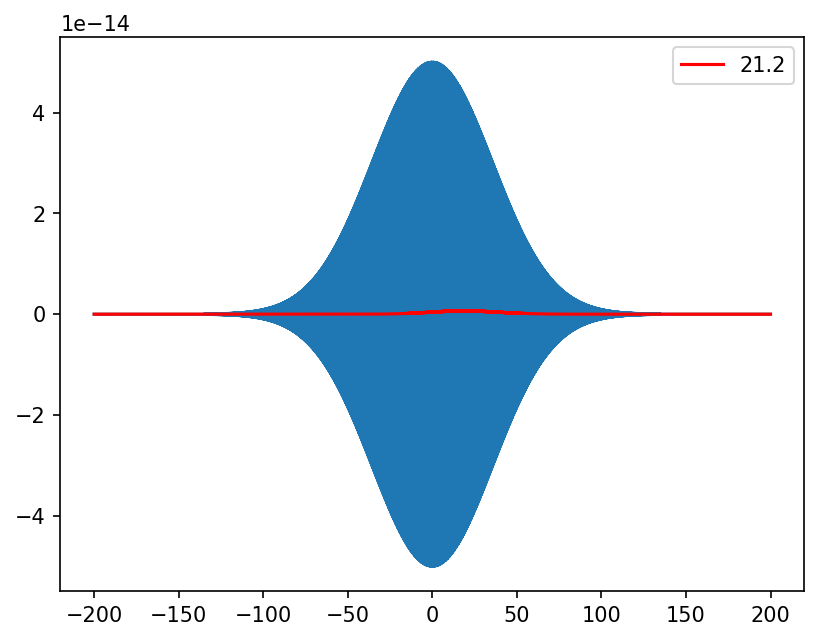

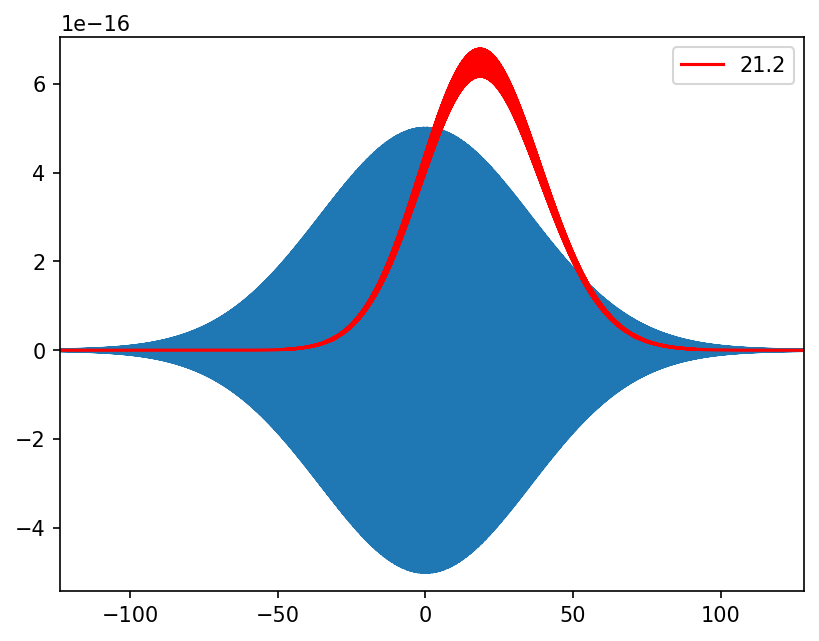

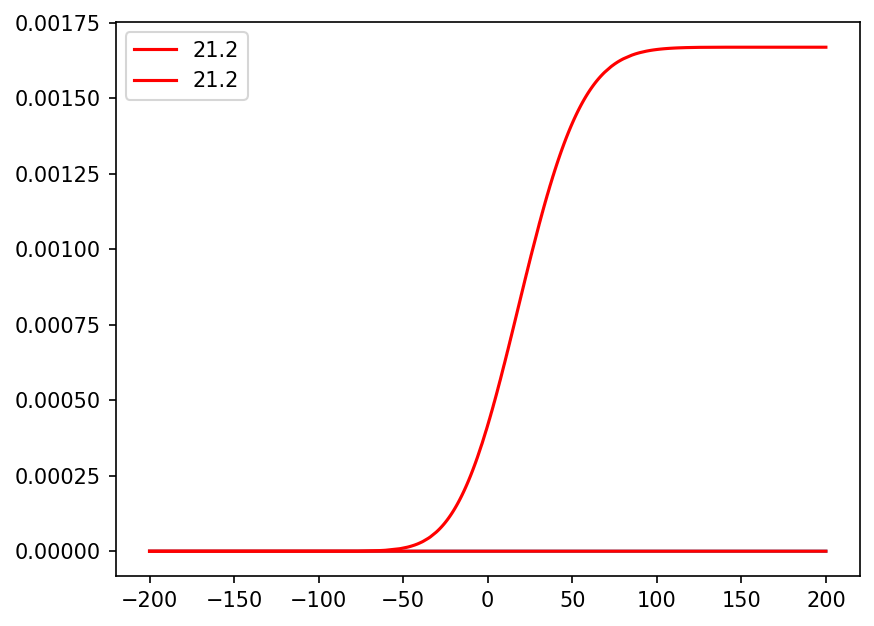

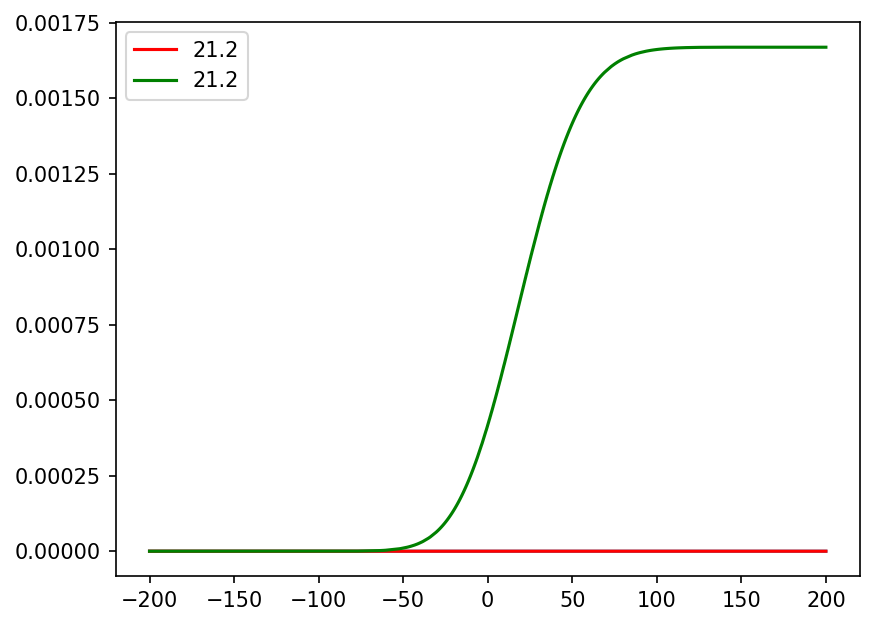

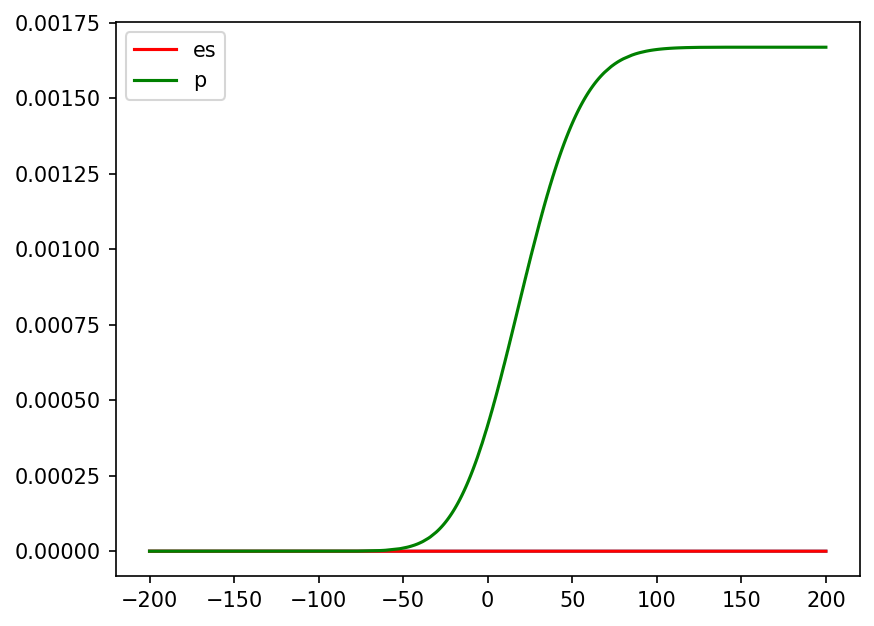

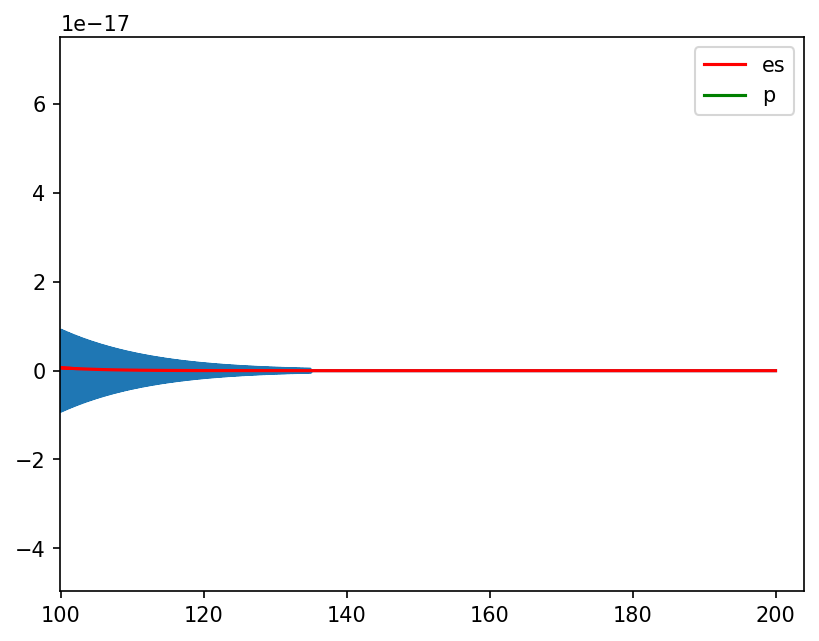

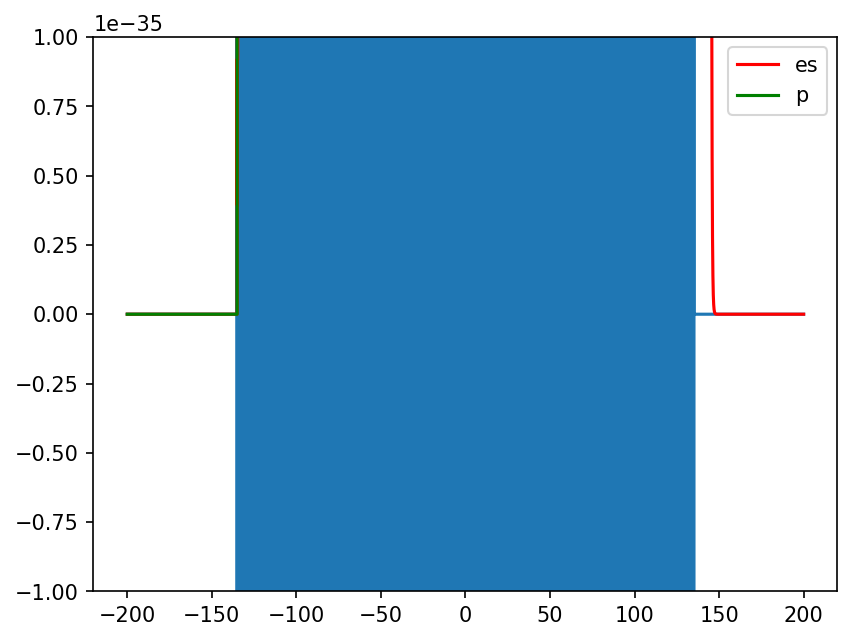

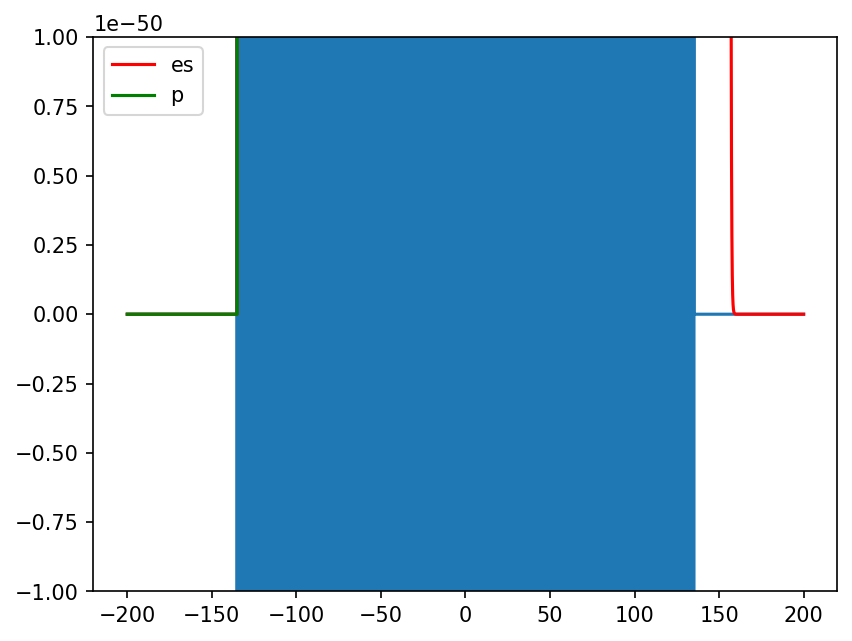

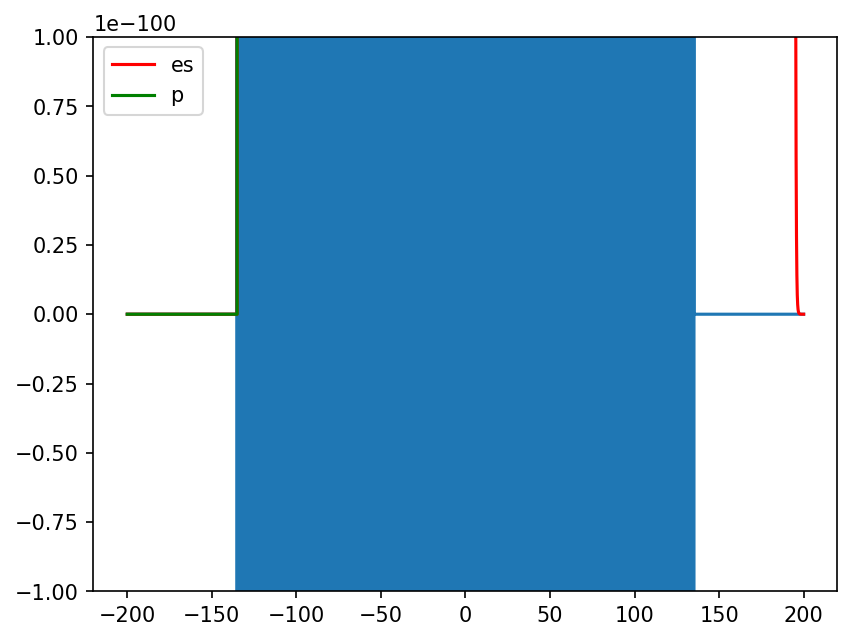

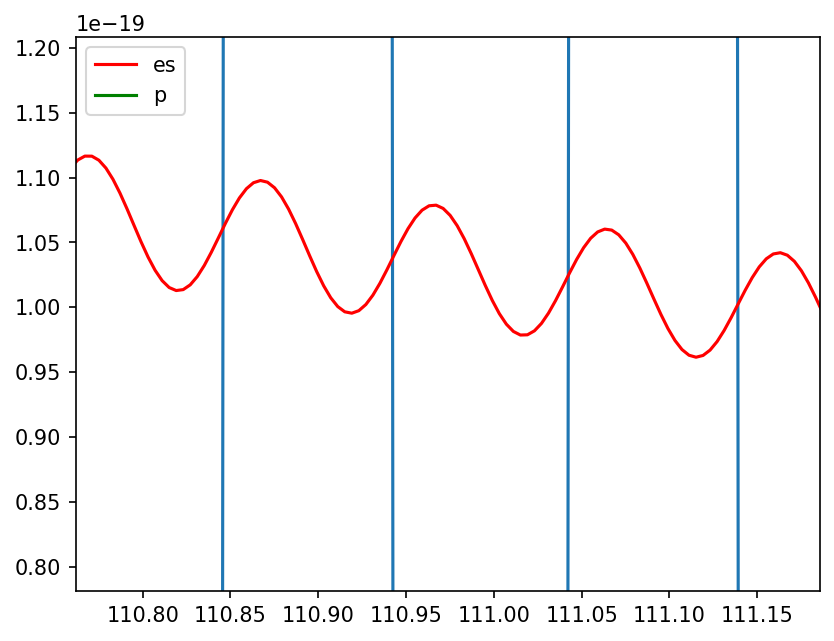

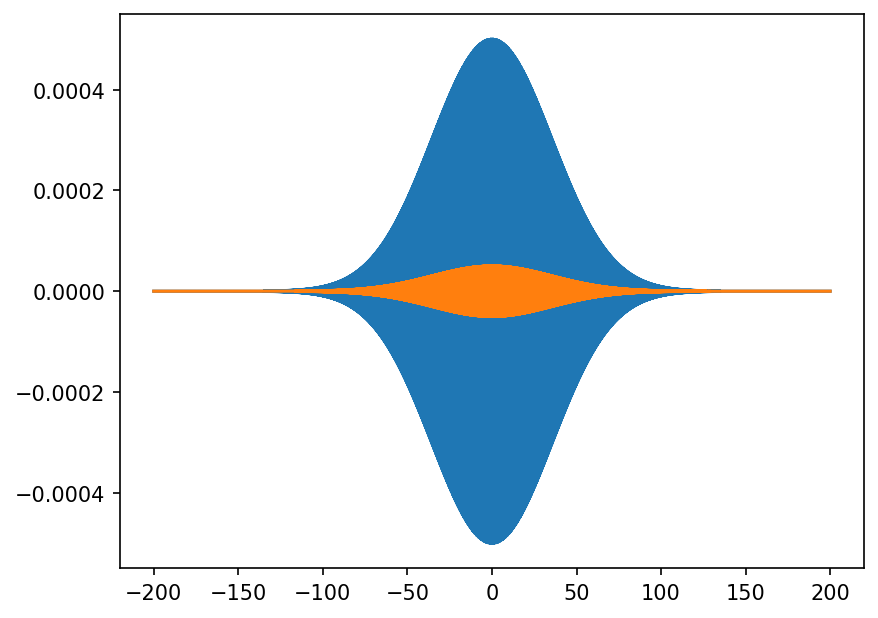

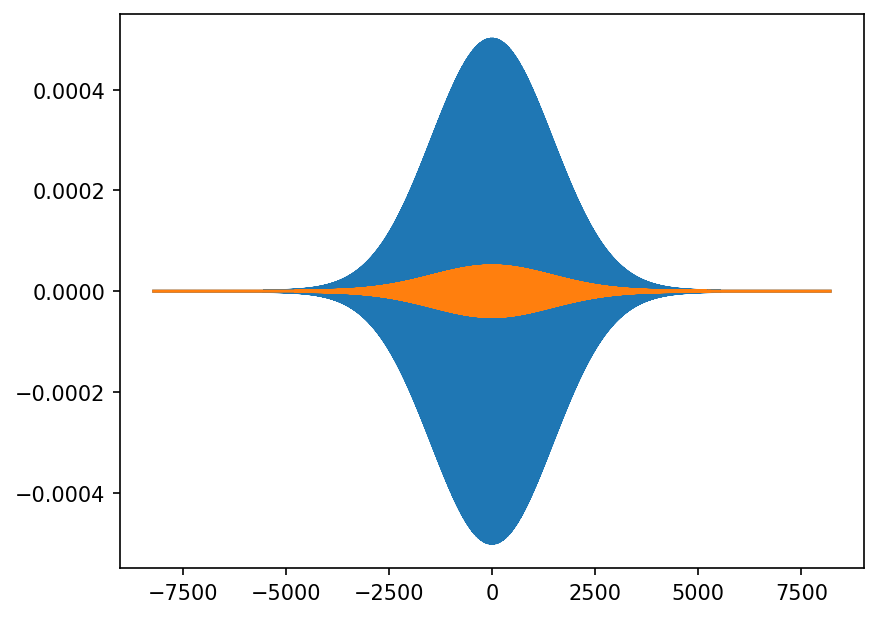

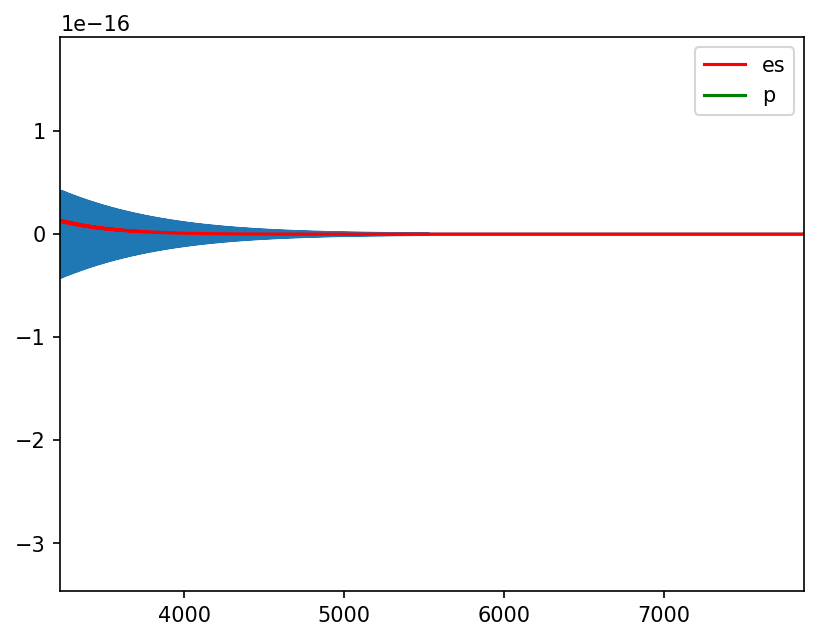

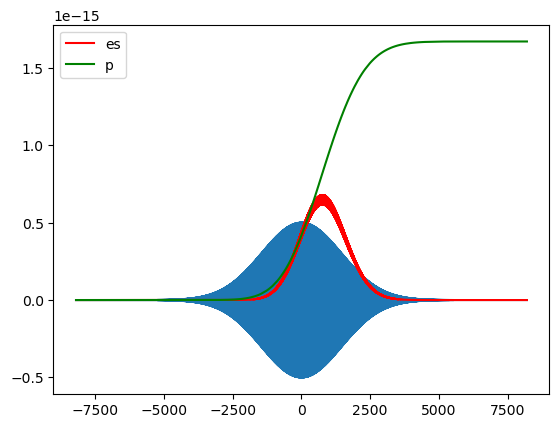

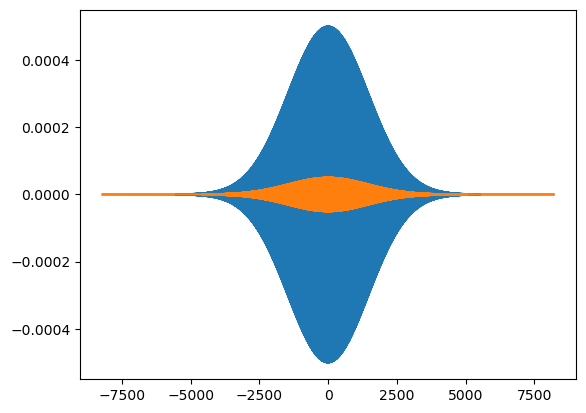

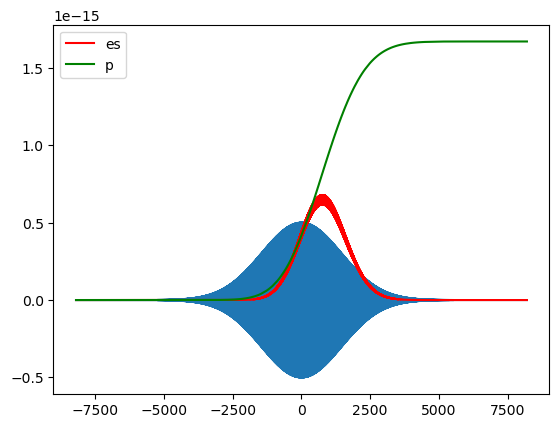

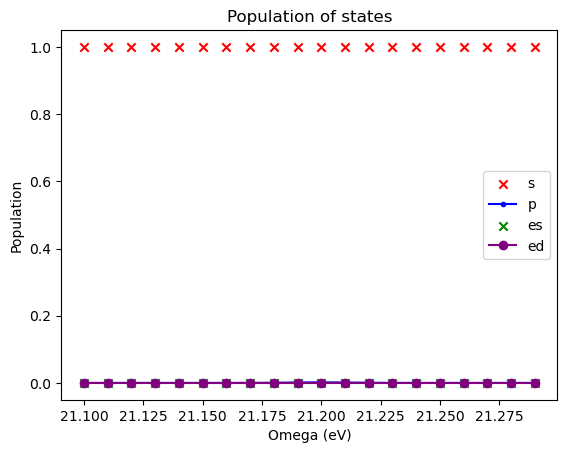

In [66]:
#populations = np.array(populations).astype(int)
%matplotlib inline
plt.figure()
plt.scatter(omega_values, populations, marker='x', label='s' , color='red')
plt.plot(omega_values, populationp, marker='.', label='p', color='blue')
plt.scatter(omega_values, populationes, marker='x', label='es', color='green')
#plt.scatter(omega_values, populationep, marker='.', label='ep', color='orange')
plt.plot(omega_values, populationed, label='ed', marker='o', color='purple')
plt.title('Population of states')
plt.xlabel('Omega (eV)')
plt.ylabel('Population')
#plt.legend(['s', 'p', 'es', 'pes', 'ed'])
#plt.legend(['es', 'ep', 'ed'])
plt.legend()
#plt.xlim(21.09, 21.2)
#plt.ylim(0, 3e-17)
plt.show()

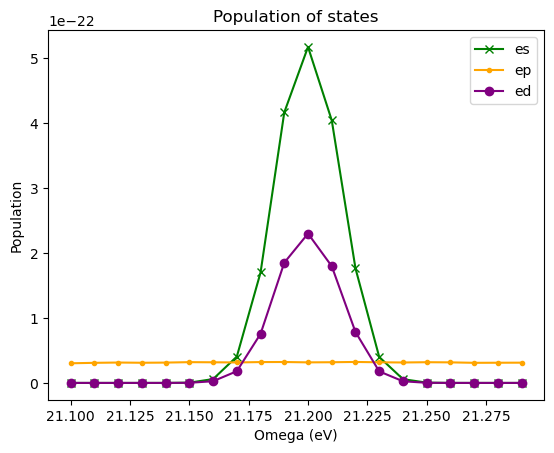

In [67]:
#populations = np.array(populations).astype(int)
plt.figure()
#plt.scatter(omega_values, populations, marker='x', label='s' , color='red')
#plt.scatter(omega_values, populationp, marker='.', label='p', color='blue')
plt.plot(omega_values, populationes, marker='x', label='es', color='green')
plt.plot(omega_values, populationep, marker='.', label='ep', color='orange')
plt.plot(omega_values, populationed, label='ed', marker='o', color='purple')
#plt.axvline(x=Ecooper, color='brown', linestyle='--', label='Cooper Minimum')
#plt.axvline(x=Eres, color='black', linestyle='--', label='Resonance')
plt.title('Population of states')
plt.xlabel('Omega (eV)')
plt.ylabel('Population')
plt.legend()
#plt.xlim(21.09, 21.35)
#plt.ylim(0, 3e-17)
plt.show()
#plt.close()

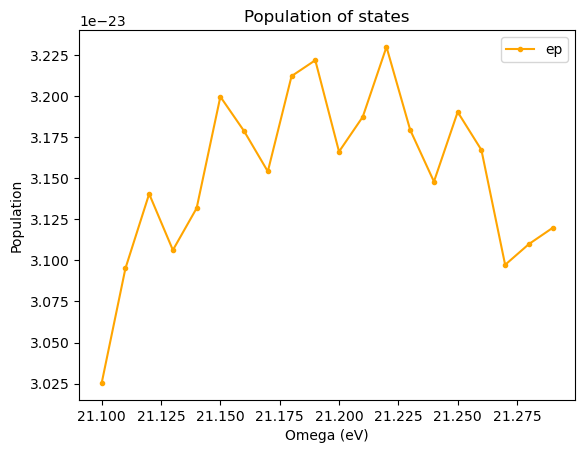

In [68]:
#populations = np.array(populations).astype(int)
plt.figure()
#plt.scatter(omega_values, populations, marker='x', label='s' , color='red')
#plt.scatter(omega_values, populationp, marker='.', label='p', color='blue')
#plt.plot(omega_values, populationes, marker='x', label='es', color='green')
plt.plot(omega_values, populationep, marker='.', label='ep', color='orange')
#plt.plot(omega_values, populationed, label='ed', marker='o', color='purple')
#plt.axvline(x=Ecooper, color='brown', linestyle='--', label='Cooper Minimum')
#plt.axvline(x=Eres, color='black', linestyle='--', label='Resonance')
plt.title('Population of states')
plt.xlabel('Omega (eV)')
plt.ylabel('Population')
plt.legend()
#plt.xlim(21.09, 21.35)
#plt.ylim(0, 3e-17)
plt.show()
#plt.close()

In [69]:
populations = []
populationp = []
populationes = []
populationep = []
populationed = []
iloc_val = 99998
steps_eV = 0.001
omega_values = np.round(np.arange(21.1, 21.3, steps_eV), 3)
for omega_ev in omega_values:
    #print(omega_ev)
    df = results_dfp[f'df_pop_{omega_ev}']
    populations.append(df['s'])
    populationp.append(df['p'])
    populationes.append(df['es'])
    populationep.append(df['ep'])
    populationed.append(df['ed'])   

In [70]:
t_values_SI1 = t_values_SI[0:-1]

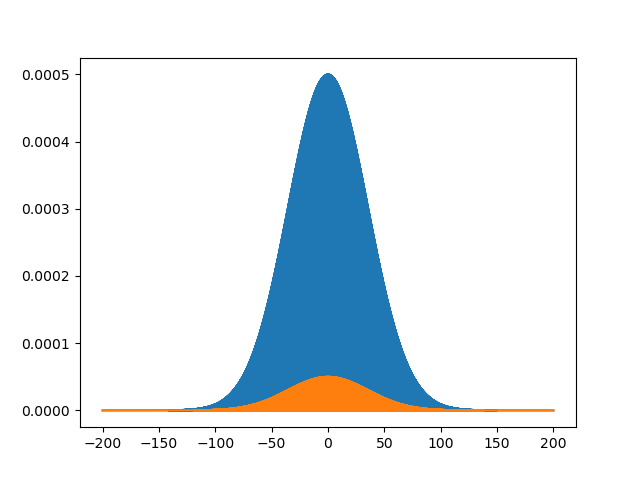

In [71]:
%matplotlib ipympl
# Electric field functions
def E_omega(t, E0_au, omega_au, t0_au, tau_au, phi1):
    # Set the time limit to 3 standard deviations (tau_au)
    t_limit = 3 * tau_au
    time_abs = np.abs(t - t0_au)
    
    return np.where(time_abs < t_limit, 
                    E0_au * np.exp(-((t - t0_au) / tau_au) ** 2) * ((np.cos(omega_au * t + phi1))**2), 
                    0)

def E_2omega(t, E02_au, omega_au, t0_au, tau_au, phi2):
    t_limit = 3 * tau_au
    time_abs = np.abs(t - t0_au)
    return np.where(time_abs < t_limit, 
                    E02_au * np.exp(-((t - t0_au) / tau_au) ** 2) * ((np.cos(2*omega_au * t + phi2))**2),
                    0)

# Electric Field parameters
phi1 = 0.0
phi2 = 0.0
tau = 50  # fs
tau_au = tau * 41
t0 = 0 # fs  # setting t0 to a non-zero value to avoid zero limit issue
t0_au = t0 * 41
E0_au = 0.0005
E02_au = 0.00005
omega_au = 21.2
E_om = E_omega(t_values, E0_au, omega_au, t0_au, tau_au, phi1)
E_2om = E_2omega(t_values, E02_au, omega_au, t0_au, tau_au, phi2)
plt.figure()
plt.plot(t_values_SI, E_om)
plt.plot(t_values_SI, E_2om)
plt.show()

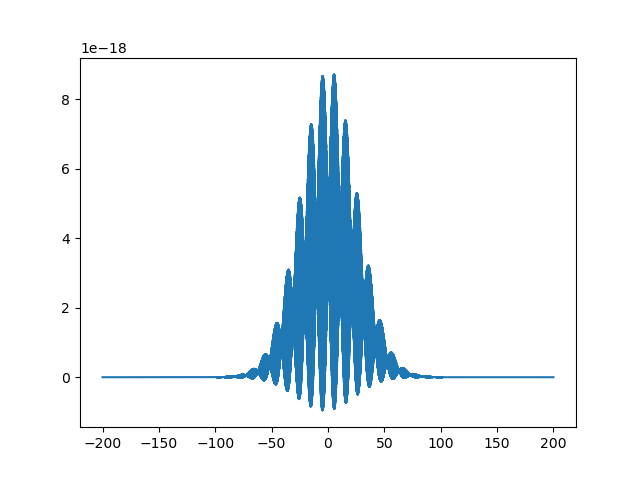

In [72]:
plt.figure()
#plt.plot(t_values_SI1, populationes[100] - populationes[0])
#plt.plot(t_values_SI1, populationes[0])
#plt.plot(t_values_SI1, populationep[0])
plt.plot(t_values_SI1, populationep[100] - populationep[0])
#plt.plot(t_values_SI1, populationep[0] - populationep[-1])
#plt.plot(t_values_SI, E_om)
#plt.plot(t_values_SI1, populationes[0] - populations[-1])
plt.show()

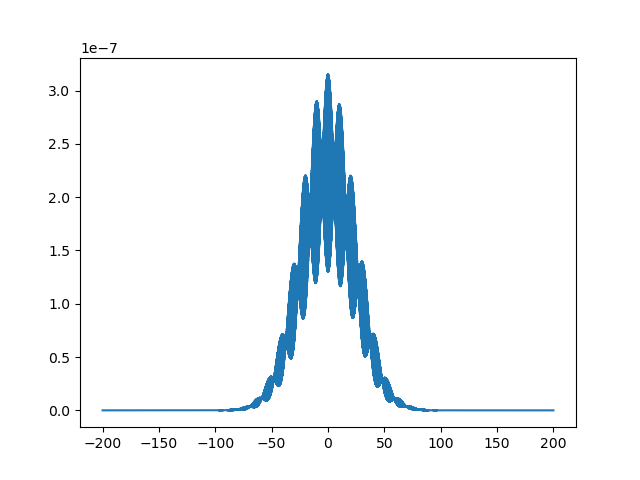

In [73]:
plt.figure()
#plt.plot(t_values_SI1, populations[100] - populations[0])
plt.plot(t_values_SI1, populations[0] - populations[-1])
plt.show()

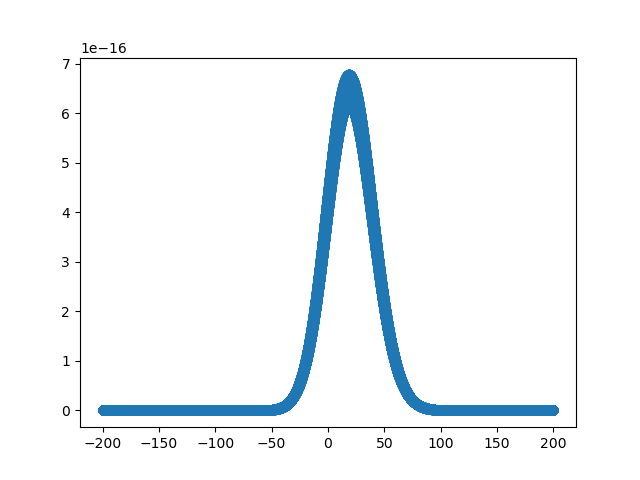

In [74]:
plt.figure()
#plt.scatter(t_values_SI1, populationes[0], marker = '.')
plt.plot(t_values_SI1, populationes[100], marker = 'o')
#plt.scatter(t_values_SI1, populationes[-1], marker = 'x')
#plt.xlim(-50,50)
plt.show()

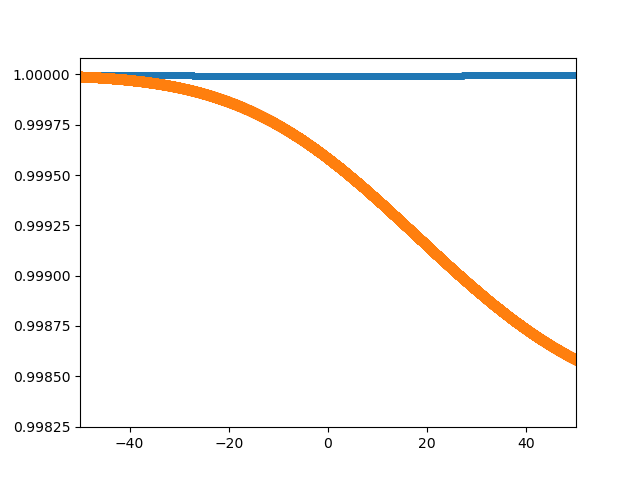

In [75]:

plt.figure()
plt.scatter(t_values_SI1, populations[0], marker = '.')
plt.scatter(t_values_SI1, populations[100], marker = 'o')
#plt.scatter(t_values_SI1, populations[-1], marker = 'x')
plt.xlim(-50,50)
plt.show()

In [76]:
populations[1]

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
99994    1.0
99995    1.0
99996    1.0
99997    1.0
99998    1.0
Name: s, Length: 99999, dtype: float64